**Calculate:**
- Range of variation (R)
- mean linear deviation (d)
- dispersion (D)
- standard deviation (Sig)
---
- The coefficient of variation (V)
- Oscillation coefficient (Vr)
- linear coefficient of variation (Vd)
---
- Quartile
- Decel
---
- Total variance
- Intergroup dispersion
- Intra-group variance
---

- The empirical coefficient of determination
- Empirical correlation relation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('2019_nCoV_data.csv')
df = df[['Province/State', 'Confirmed']]
States = set(df['Province/State'].to_list())

State_Conf = {}
for state in States:
    State_Conf[state] = int(sum(df[df['Province/State']==state]['Confirmed']))
State_Conf
list_of_keys = list(State_Conf.keys())
list_of_values = list(State_Conf.values())
data = pd.DataFrame({'State': list_of_keys[:20], 'Confirmed': list_of_values[:20]})
data = data.set_index('State').sort_values('Confirmed')


In [3]:
from pandas_ods_reader import read_ods
data = read_ods('ex1.ods', "Sheet1")  
print(data[:5], '\n\n', data[-5:])
data.plot()

   Col_1  Col_2  Col_3
0   82.0   96.0   88.0
1   88.0  100.0   92.0
2   81.0   90.0   97.0
3   99.0   88.0   99.0
4   82.0   82.0   94.0 

     Col_1  Col_2  Col_3
26   93.0   89.0   82.0
27   88.0   81.0   92.0
28   97.0   89.0   91.0
29   84.0   94.0   88.0
30   95.0   82.0   91.0


count    31.000000
mean     88.483871
std       6.217561
min      81.000000
25%      83.000000
50%      87.000000
75%      95.000000
max      99.000000
Name: Col_1, dtype: float64


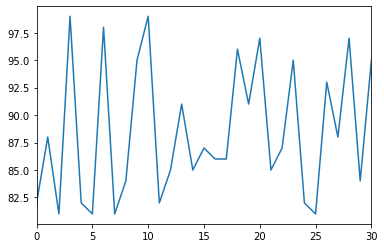

In [4]:
data1 = data['Col_1']
data1.plot()
print(data1.describe())
data1 = data1.to_list()

In [5]:
# Range of variation (R)
R = max(data1) - min(data1)
R

18.0

In [6]:
# mean linear deviation (d)
m = sum(data1)/len(data1)
d = sum([abs(xi - m) for xi in data1])/len(data1)
m , d

(88.48387096774194, 5.431841831425598)

In [7]:
#dispersion (D)
D = sum([(xi - m)**2 for xi in data1])/len(data1)
D

37.41103017689906

In [8]:
# standard deviation (Sig)
from math import sqrt
Sig = sqrt(D)
Sig

6.116455687479397

In [9]:
# The coefficient of variation (V)
V = Sig/m
V

0.06912509161934426

In [10]:
# Oscillation coefficient (Vr)
Vr = R/m
Vr

0.2034269048487058

In [11]:
# linear coefficient of variation (Vd)
Vd = d/m
Vd

0.06138793174414639

AxesSubplot(0.125,0.125;0.775x0.755)
82.0 87.0 95.0


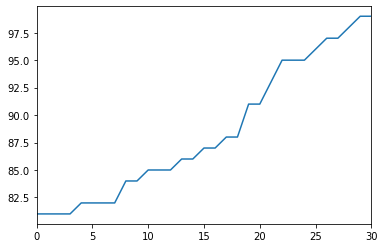

In [12]:
# Quartile
data['new'] = data['Col_1'].sort_values().to_list()
print(data['new'].plot())
data_list = data['new'].to_list()
Q1 = data_list[1*len(data1)//4]
Q2 = data_list[2*len(data1)//4]
Q3 = data_list[3*len(data1)//4]
print(Q1, Q2, Q3)

In [13]:
# Decel
Q3 = data_list[3*len(data1)//4]
decels = [ data_list[i*len(data1)//10] for i in range(1, 10)]
decels

[81.0, 82.0, 84.0, 85.0, 87.0, 88.0, 93.0, 95.0, 97.0]

In [34]:
# Total dispersion
def avg(l): return sum(l)/len(l)

groups = [ data_list[i:i+6] for i in range(5)]
data_groups = pd.DataFrame({'gr1': groups[0],
                            'gr2': groups[1],
                            'gr3': groups[2],
                            'gr4': groups[3],
                            'gr5': groups[4]})
print(data_groups)

Dg = 0
for i in range(len(groups)):
    for k in range(len(groups[i])):
        Dg += (groups[i][k] - avg(groups[i]))**2
        
Dg = Dg/len(groups[1])
Dg

    gr1   gr2   gr3   gr4   gr5
0  81.0  81.0  81.0  81.0  82.0
1  81.0  81.0  81.0  82.0  82.0
2  81.0  81.0  82.0  82.0  82.0
3  81.0  82.0  82.0  82.0  82.0
4  82.0  82.0  82.0  82.0  84.0
5  82.0  82.0  82.0  84.0  84.0


2.388888888888888

In [35]:
# Intergroup dispersion
Di = 0
for i in range(len(groups)):
    for k in range(len(groups[i])):
        Di += (groups[i][k] - avg(groups[i]))**2 * len(groups[1])
        
Di = Di/len(data_list)
Di

2.774193548387097

In [53]:
# Intra-group variance
print(sqrt(abs(Dg**2 - Di**2)))  


1.4104466386417482


In [59]:
# The empirical coefficient of determination
tetta_pow2 = Sig**2/D
tetta_pow2

1.0000000000000002

In [60]:
# Empirical correlation relation
sqrt(tetta_pow2)

1.0